# 0- importing libiraries

In [51]:
# === Core Libraries ===
import numpy as np
import pandas as pd

# === Visualization ===
import matplotlib.pyplot as plt
import seaborn as sns

# === Machine Learning: Data Preprocessing & Modeling ===
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

# === Evaluation Metrics ===
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# === Model Saving ===
import joblib

# === Settings ===
import warnings
warnings.filterwarnings('ignore')

# Random seed for reproducibility
RANDOM_STATE = 42


# 1- Loading data - getting info 
- This step involves reading the dataset from its source (like a CSV file) into a data structure (like a Pandas DataFrame), and then performing quick checks to see the size, data types, and missing values of your columns.

In [3]:
df = pd.read_csv(r'd:\DEPI\Final_project\main_data\used_cars.csv')
 
df.shape  # 4009 rows , 12 columns

(4009, 12)

In [4]:
display(df.columns.to_list())


['brand',
 'model',
 'model_year',
 'milage',
 'fuel_type',
 'engine',
 'transmission',
 'ext_col',
 'int_col',
 'accident',
 'clean_title',
 'price']

In [5]:
display(df.head())
display(df.tail())

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
4004,Bentley,Continental GT Speed,2023,714 mi.,Gasoline,6.0L W12 48V PDI DOHC Twin Turbo,8-Speed Automatic with Auto-Shift,C / C,Hotspur,None reported,Yes,"$349,950"
4005,Audi,S4 3.0T Premium Plus,2022,"10,900 mi.",Gasoline,349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,"$53,900"
4006,Porsche,Taycan,2022,"2,116 mi.",NaN,Electric,Automatic,Black,Black,None reported,NaN,"$90,998"
4007,Ford,F-150 Raptor,2020,"33,000 mi.",Gasoline,450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,Blue,Black,None reported,Yes,"$62,999"
4008,BMW,X3 xDrive30i,2020,"43,000 mi.",Gasoline,248.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Brown,At least 1 accident or damage reported,Yes,"$40,000"


In [6]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         4009 non-null   object
 1   model         4009 non-null   object
 2   model_year    4009 non-null   int64 
 3   milage        4009 non-null   object
 4   fuel_type     3839 non-null   object
 5   engine        4009 non-null   object
 6   transmission  4009 non-null   object
 7   ext_col       4009 non-null   object
 8   int_col       4009 non-null   object
 9   accident      3896 non-null   object
 10  clean_title   3413 non-null   object
 11  price         4009 non-null   object
dtypes: int64(1), object(11)
memory usage: 376.0+ KB


None

In [7]:
df.describe(include='all')

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
count,4009,4009,4009.000000,4009,3839,4009,4009,4009,4009,3896,3413,4009
unique,57,1898,NaN,2818,7,1146,62,319,156,2,1,1569
top,Ford,M3 Base,NaN,"110,000 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,A/T,Black,Black,None reported,Yes,"$15,000"
freq,386,30,NaN,16,3309,52,1037,905,2025,2910,3413,39
mean,NaN,NaN,2015.515590,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,6.104816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1974.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,2020.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.memory_usage(deep=True).sum() / (1024**2)  # memory size is 2.58 MB 

np.float64(2.5840139389038086)

### 🧾 Step 1 Summary: Data Loading & Initial Exploration

- The dataset was successfully loaded and contains **4,009 rows** and **12 columns**.  
- Key features include:  
  `brand`, `model`, `model_year`, `milage`, `fuel_type`, `engine`, `transmission`, `ext_col`, `int_col`, `accident`, `clean_title`, and `price`.  
- Most columns appear to be **categorical (`object`)**, while others like **`price`**, **`milage`**, and **`model_year`** are **numerical** or may require type conversion.  
- The dataset shows no loading issues, and all columns were correctly detected.  
- The total dataset size is approximately **2.58 MB**.


# 2- type changing - data cleaning

- This step focuses on ensuring that each column in the dataset has the appropriate data type (e.g., converting strings to dates or numbers) and cleaning the data by handling missing values, removing duplicates, and correcting inconsistencies.

In [9]:
print(df.isna().sum())       # fuel_type 170 , accident 113 and clean_title 596
print(df.duplicated().sum()) # no duplicated value

brand             0
model             0
model_year        0
milage            0
fuel_type       170
engine            0
transmission      0
ext_col           0
int_col           0
accident        113
clean_title     596
price             0
dtype: int64
0


**1- replaceing prefix**

In [10]:
df['milage'] = df['milage'].str.replace(' mi.', '').str.replace(',', '').astype(int) # removing (mi and ,)
df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(int) # removing ($ and ,)


**2- cleaning fuel type**

In [11]:
df['fuel_type'] = df['fuel_type'].str.strip().str.upper().replace(
    {'PLUG-IN HYBRID': 'HYBRID',
      'NOT SUPPORTED':'OTHER',
        '–':'OTHER'})

df['fuel_type'].value_counts()  # fuel column now have only 5 types  

fuel_type
GASOLINE         3309
HYBRID            228
E85 FLEX FUEL     139
DIESEL            116
OTHER              47
Name: count, dtype: int64

**3-cleaning transmission column**

In [12]:
def classify_transmission(transmission):
    T = str(transmission).upper()
    
    if 'M/T' in T or 'MT' in T or 'MANUAL' in T: # manual transmission
        return 'M/T'  
    elif 'A/T' in T or 'AT' in T or 'AUTOMATIC' in T: # automatic transmission
        return 'A/T'
    elif 'CVT' in T or 'VARIABLE' in T or 'SINGLE-SPEED' in T: # CVT transmission (Continuously Variable Transmission)
        return 'CVT'
    else:
        return 'OTHER'
    
df['transmission'] = df['transmission'].apply(classify_transmission)

df['transmission'].value_counts() # transmission column now have 4 types 

transmission
A/T      3147
OTHER     418
M/T       376
CVT        68
Name: count, dtype: int64

**4- type conversion**

- change categorical columns

In [13]:
categorical_cols = ['brand', 'fuel_type', 'transmission', 'ext_col', 'int_col', 'accident', 'clean_title']

# Convert categorical columns
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')

- change numrical columns

In [14]:
numeric_cols = ['price', 'milage']
integer_cols = ['model_year']

# Convert numeric (float) columns
for col in numeric_cols:
    if col in df.columns:
        df[col] = df[col].astype('float64')

# Convert integer columns
for col in integer_cols:
    if col in df.columns:
        df[col] = df[col].astype('int64')

In [15]:
print(df.dtypes)   # final type of all columns

# 💾 Show updated memory usage
print(f"\n💾 Total memory usage: {df.memory_usage(deep=True).sum() / (1024**2):.2f} MB")


brand           category
model             object
model_year         int64
milage           float64
fuel_type       category
engine            object
transmission    category
ext_col         category
int_col         category
accident        category
clean_title     category
price            float64
dtype: object

💾 Total memory usage: 0.76 MB


**5-handling missing values**

- fuel_type column handling

In [16]:
# Get the most common (mode) fuel_type per brand
most_common_fuel = (
    df.groupby('brand')['fuel_type']
      .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else None)
)

# Map each brand to its most common fuel type
df['fuel_type'] = df['fuel_type'].fillna(df['brand'].map(most_common_fuel))

# Fill any remaining missing with "OTHER"
df['fuel_type'] = df['fuel_type'].fillna('OTHER')


- accident column handling

In [17]:
# filling null value to be None reported
df['accident'] = df['accident'].fillna('None reported')


- clean_title column handling

In [18]:
# Add 'Unknown' as a valid category
df['clean_title'] = df['clean_title'].cat.add_categories(['Unknown'])

# fill missing value with unknown 
df['clean_title'] = df['clean_title'].fillna('Unknown')



**6-remvoing outliers**

In [19]:
# Select numeric columns for outlier detection
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
print("Numeric columns to check for outliers:")
print(numeric_cols)


Numeric columns to check for outliers:
Index(['model_year', 'milage', 'price'], dtype='object')


- outliers visualization

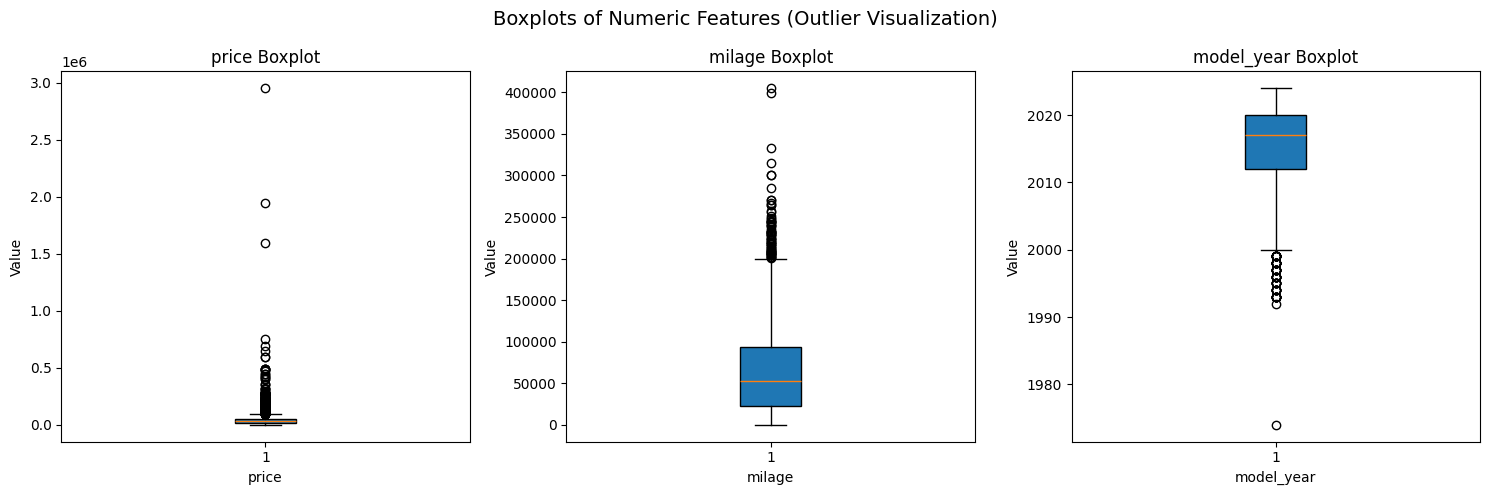

In [20]:
numeric_cols = ['price', 'milage', 'model_year']

plt.figure(figsize=(15, 5))

# Boxplots for outlier detection
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 3, i)
    plt.boxplot(df[col], patch_artist=True)
    plt.title(f"{col} Boxplot")
    plt.xlabel(col)
    plt.ylabel("Value")

plt.suptitle("Boxplots of Numeric Features (Outlier Visualization)", fontsize=14)
plt.tight_layout()
plt.show()


- **Price:** A few high-price cars (> $90,000) appear as outliers, but they represent luxury vehicles, not errors.
- **Mileage:** High-mileage cars (200k–350k mi) are realistic for older used vehicles.
- **Model Year:** Some older models (<2000) and recent ones (2023–2024) appear, but all within realistic bounds.

- removing model_year that under (2000)

In [21]:
# Check how many cars are older than year 2000
# Remove cars older than year 2000
df = df[df['model_year'] >= 2000].reset_index(drop=True)

print(f"✅ Remaining records after removing pre-2000 cars: {df.shape[0]}")



✅ Remaining records after removing pre-2000 cars: 3942


- removing the remaining outliers

In [22]:
numeric_cols = ['price', 'milage']
df_clean = df.copy()

def remove_outliers_iqr(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Keep only rows within the IQR range
        before = data.shape[0]
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
        after = data.shape[0]

        print(f"✅ {col}: Removed {before - after} outliers (Remaining: {after})")

    return data

# Apply the function to your dataset
df = remove_outliers_iqr(df_clean, numeric_cols)

print(f"\n✅ Final dataset shape after outlier removal: {df.shape}")


✅ price: Removed 250 outliers (Remaining: 3692)
✅ milage: Removed 61 outliers (Remaining: 3631)

✅ Final dataset shape after outlier removal: (3631, 12)


**finishing the cleaning**

In [23]:
print(f'the shape of the data is {df.shape}') # we didn't drop anything from the data
print(f"\n💾 Total memory usage after cleaning : {df.memory_usage(deep=True).sum() / (1024**2):.2f} MB") # 0.72 MB

the shape of the data is (3631, 12)

💾 Total memory usage after cleaning : 0.72 MB


### 🧹 Step 2 Summary: Data Cleaning & Type Conversion

- Removed symbols (`$`, `mi`, `,`) from **price** and **milage**, converting them to numeric values.  
- Standardized **fuel_type** and **transmission** categories for consistency.  
- Converted all columns to appropriate data types (categorical, integer, float), reducing memory to **0.72 MB**.  
- Filled missing values:
  - `fuel_type` by brand mode → `'OTHER'`
  - `accident` → `'None reported'`
  - `clean_title` → `'Unknown'`
- removed **67 cars** with `model_year < 2000`.  
- Removed **outliers** in `price` = 250 and `milage` = 61 using the **IQR method**, improving data quality  
- Data shape reduced from **4009** rows to **3631** rows
- Final dataset is clean, consistent, and ready for feature engineering.


# 3- Feature engneering

- This step involves creating new features or modifying existing ones to enhance the dataset's predictive power. This could include techniques like encoding categorical variables, scaling numerical features, or generating interaction terms.

**1-hourse power column**

In [24]:
df['hp'] = df['engine'].str.extract(r'(\d+\.\d+)HP').astype(float, errors='ignore') 

# handling missing values in hourse power column
df['hp'] = df.groupby('brand')['hp'].transform(lambda x: x.fillna(x.mean()))
df.dropna(subset=['hp'], inplace=True)

df['hp'] = df['hp'].astype(int)


**2- engine displacement column**

In [25]:
# Extract engine displacement (in liters) 3.7L = 3700 cc
df['engine_displacement'] = df['engine'].str.extract(r'(\d+\.\d+)\s*L')
df['engine_displacement'] = df['engine_displacement'].fillna(df['engine'].str.extract(r'(\d+\.\d+)\s*LITER')[0])
df['engine_displacement'] = df['engine_displacement'].astype(float, errors='ignore')

# Fill missing values with brand-wise mode, then overall median
most_common_displacement = (
    df.groupby('brand')['engine_displacement']
      .agg(lambda x: x.mode()[0] if not x.mode().empty else None)
)

df['engine_displacement'] = df.apply(
    lambda row: most_common_displacement[row['brand']]
    if pd.isna(row['engine_displacement']) else row['engine_displacement'],
    axis=1
)

df['engine_displacement'] = df['engine_displacement'].fillna(
    df['engine_displacement'].median()
)


**3- V type engines column**

In [26]:
df['is_v_engine'] = df['engine'].str.contains(r'V\d+', case=False, na=False)  # shape and arrangement of the cylinders

**4- vehicle age column**

In [27]:
df['Vehicle_Age'] = 2025 - df['model_year']

**5- mileage per year column**

In [28]:
df['Mileage_per_Year'] = df.apply(
    lambda row: row['milage'] / row['Vehicle_Age'] if row['Vehicle_Age'] > 0 else row['milage'],
    axis=1
)

**6- (vehicle age) and (mileage) category**

In [29]:
# Binning
df['Vehicle_Age_Bin'] = pd.qcut(df['Vehicle_Age'], q=4, labels=['New', 'Mid', 'Old', 'Very Old'])
df['Mileage_Bin'] = pd.qcut(df['milage'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

# One-hot encode
df = pd.get_dummies(df, columns=['Vehicle_Age_Bin', 'Mileage_Bin'], prefix=['Age', 'Milage'], drop_first=True, dtype=int)

**7- encoding accident , clean_title and is_v_engine**

In [30]:
# 1 made accident , 0 for no accident
df['Accident_Impact'] = df['accident'].apply(lambda x: 1 if x == 'At least 1 accident or damage reported' else 0)

# 1 for clean title , o for not clean title
df['clean_title'] = df['clean_title'].apply(lambda x: 1 if x == 'Yes' else 0)


# Convert True/False to 1/0
df['is_v_engine'] = df['is_v_engine'].astype(int)

# Verify the encoding
print(df['is_v_engine'].value_counts(dropna=False))

is_v_engine
0    2503
1    1127
Name: count, dtype: int64


**8- Drop Unnecessary Columns**

In [31]:
cols_to_drop = [
    'model',          # too many unique values (high cardinality)
    'model_year',     # replaced by Vehicle_Age
    'engine',         # replaced by hp, engine displacement, is_v_engine
    'int_col',        # low impact on price
    'ext_col',        # low impact on price
    'accident'        # encode to be Accident_Impact
]

# Drop the columns
df.drop(columns=cols_to_drop, inplace=True)

print(f"✅ Removed unnecessary columns: {cols_to_drop}")
print(f"Remaining columns: {df.columns.to_list()}")

✅ Removed unnecessary columns: ['model', 'model_year', 'engine', 'int_col', 'ext_col', 'accident']
Remaining columns: ['brand', 'milage', 'fuel_type', 'transmission', 'clean_title', 'price', 'hp', 'engine_displacement', 'is_v_engine', 'Vehicle_Age', 'Mileage_per_Year', 'Age_Mid', 'Age_Old', 'Age_Very Old', 'Milage_Medium', 'Milage_High', 'Milage_Very High', 'Accident_Impact']


In [32]:
print(f'the shape of the data is {df.shape}') 
print(f"\n💾 Total memory usage after feature engneering : {df.memory_usage(deep=True).sum() / (1024**2):.2f} MB") # 0.41 MB

the shape of the data is (3630, 18)

💾 Total memory usage after feature engneering : 0.41 MB


### 🧠 Step 3 Summary: Feature Engineering

- **Extracted quantitative features from text data**
  - Derived **`hp`** (horsepower) from the `engine` column.
  - Extracted **`engine_displacement`** in liters from engine descriptions.
  - Created **`is_v_engine`** flag to indicate V-type engines.

- **Handled missing values**
  - Filled missing `hp` using the mean horsepower within each brand.
  - Filled missing `engine_displacement` using brand-wise mode, then overall median.

- **Derived temporal and ratio-based features**
  - Created **`Vehicle_Age`** = `2025 - model_year`.
  - Created **`Mileage_per_Year`** = `milage / Vehicle_Age`.

- **Binned and encoded categorical ranges**
  - Binned `Vehicle_Age` into 4 quantiles → `New`, `Mid`, `Old`, `Very Old`.
  - Binned `milage` into 4 quantiles → `Low`, `Medium`, `High`, `Very High`.
  - Applied one-hot encoding on both binned features.

- **Encoded vehicle condition**
  - Converted `accident` to binary **`Accident_Impact`** (1 = accident reported, 0 = none).
  - Converted `clean_title` to binary (1 = clean, 0 = not clean).

- **Dropped redundant columns**
  - Removed: `model`, `model_year`, `engine`, `int_col`, `ext_col`, and `accident`.

- **Data shape and Size**
  - Shape = **(3630, 18)**
  - Size  = **0.41 MB**
  
✅ **Result:**  
The dataset is now feature-rich, fully numeric, and model-ready — capturing technical, temporal, and condition-related characteristics of each vehicle while removing redundant data.


# 4- Exploratory Data Analysis (EDA)
- This step involves analyzing the dataset to uncover patterns, relationships, and insights. This can include visualizations, statistical summaries, and correlation analyses to understand how different features interact with each other and with the target variable.

### 1- Feature Overview & Distributions

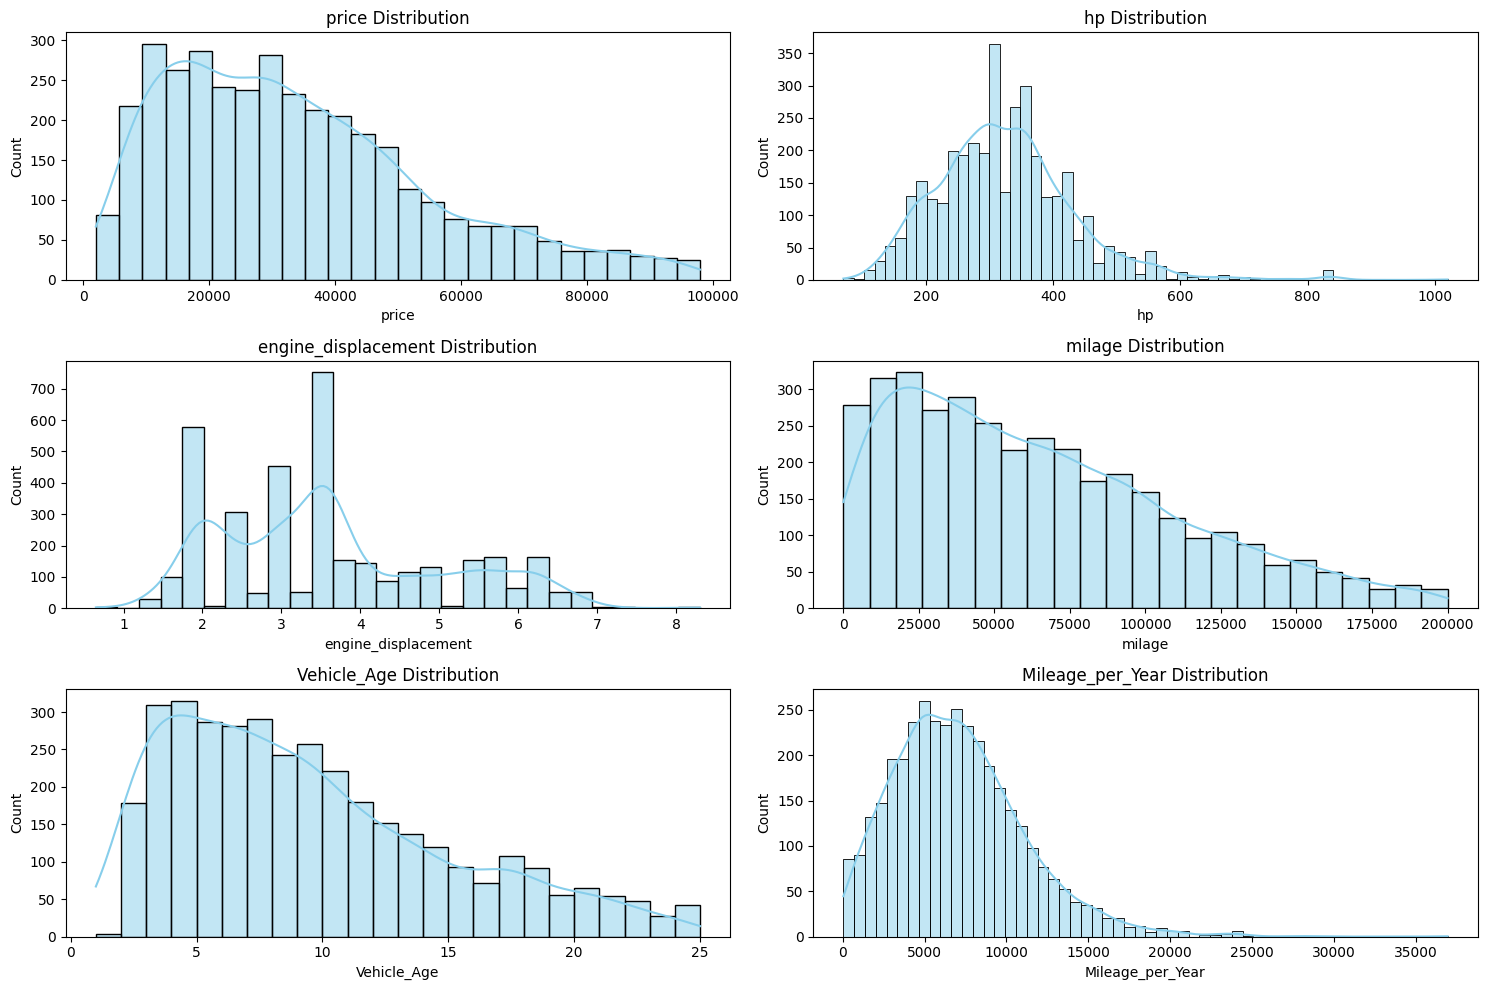

In [33]:
num_cols = ['price', 'hp', 'engine_displacement', 'milage', 'Vehicle_Age', 'Mileage_per_Year']

plt.figure(figsize=(15,10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()


### 2- Correlation with Price

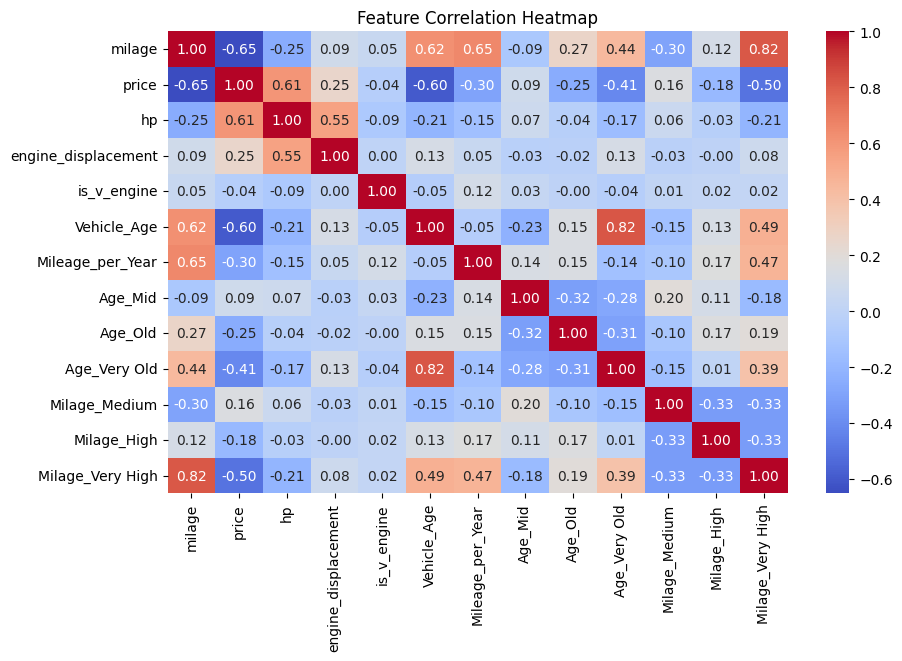

price                  1.000000
hp                     0.606043
engine_displacement    0.251717
Milage_Medium          0.155230
Age_Mid                0.086347
is_v_engine           -0.042973
Milage_High           -0.180803
Age_Old               -0.251686
Mileage_per_Year      -0.299899
Age_Very Old          -0.413533
Milage_Very High      -0.497110
Vehicle_Age           -0.598725
milage                -0.651564
Name: price, dtype: float64

In [34]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

df.corr(numeric_only=True)['price'].sort_values(ascending=False)  # value of correlation with price


### 3- Brand Insights

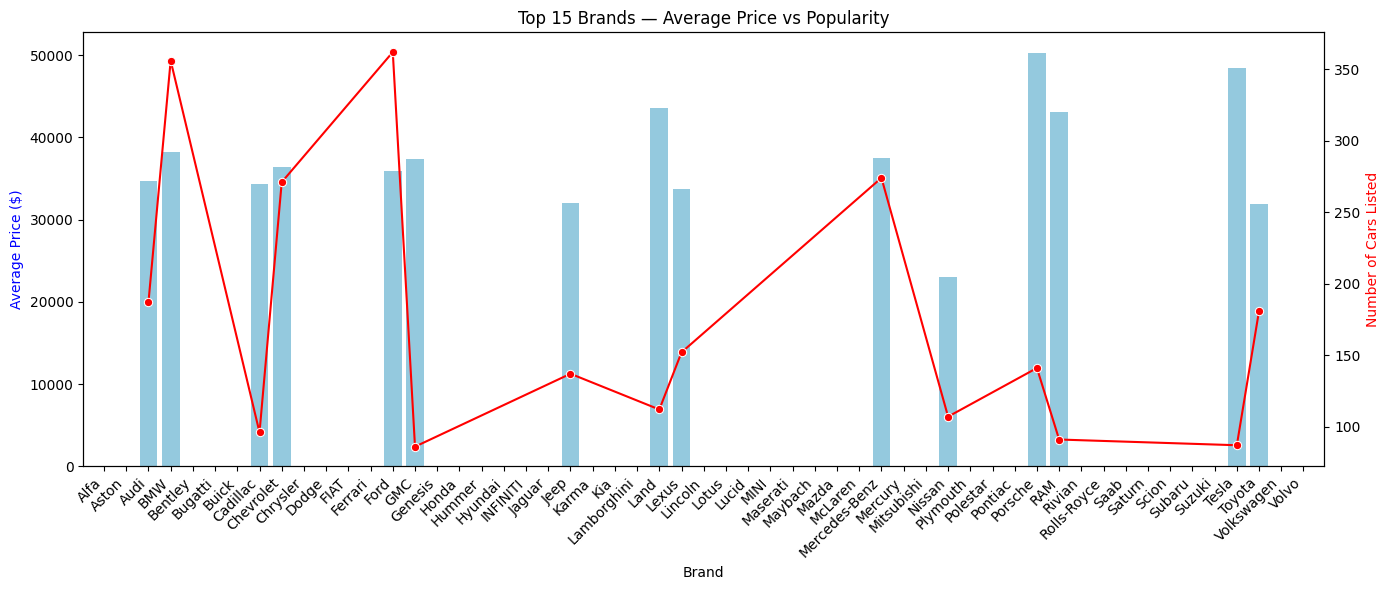

In [35]:
# Calculate brand-level statistics
brand_stats = (
    df.groupby('brand')
      .agg(
          avg_price=('price', 'mean'),  # average price per brand
          count=('price', 'size')       # how many cars per brand
      )
      .sort_values(by='count', ascending=False)  # sort by popularity
      .head(15)  # keep top 15 brands for readability
)

# Create a figure with two y-axes (one for bars, one for the red line)
fig, ax1 = plt.subplots(figsize=(14,6))

# Plot bar chart for average price per brand
sns.barplot(
    x=brand_stats.index,
    y=brand_stats['avg_price'],
    ax=ax1,
    color='skyblue'
)
ax1.set_ylabel('Average Price ($)', color='blue')
ax1.set_xlabel('Brand')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

# Create a secondary Y-axis for the line plot (brand frequency)
ax2 = ax1.twinx()

# Plot line chart for number of listings (brand popularity)
sns.lineplot(
    x=brand_stats.index,
    y=brand_stats['count'],
    ax=ax2,
    color='red',
    marker='o'
)
ax2.set_ylabel('Number of Cars Listed', color='red')

plt.title('Top 15 Brands — Average Price vs Popularity')
plt.tight_layout()
plt.show()


### 4- Engine & Power Relationship

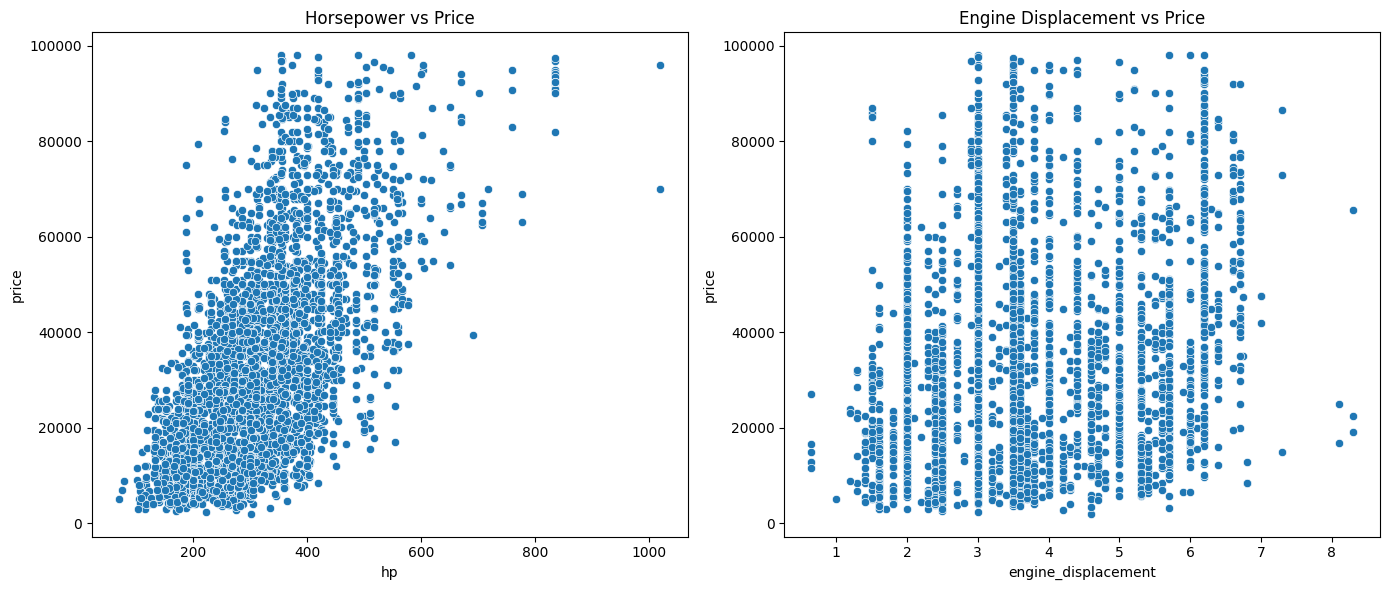

In [36]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.scatterplot(x='hp', y='price', data=df)
plt.title('Horsepower vs Price')

plt.subplot(1,2,2)
sns.scatterplot(x='engine_displacement', y='price', data=df)
plt.title('Engine Displacement vs Price')
plt.tight_layout()
plt.show()


### 5- Vehicle Age & Mileage with Price

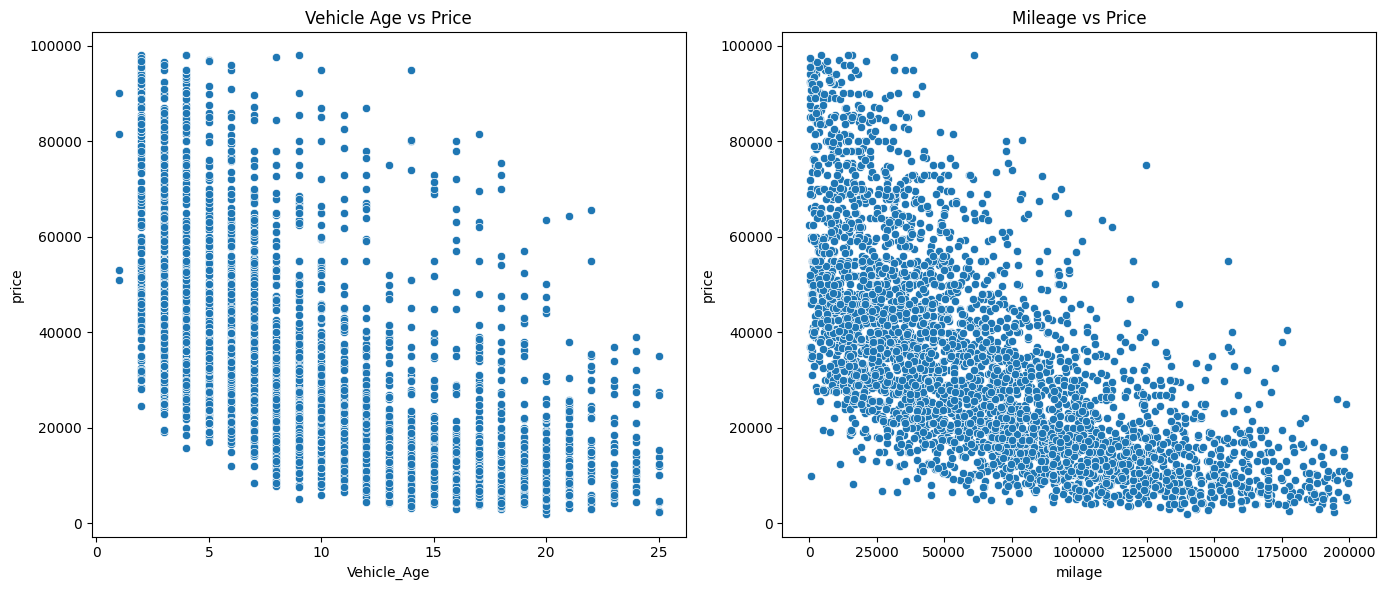

In [37]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.scatterplot(x='Vehicle_Age', y='price', data=df)
plt.title('Vehicle Age vs Price')

plt.subplot(1,2,2)
sns.scatterplot(x='milage', y='price', data=df)
plt.title('Mileage vs Price')
plt.tight_layout()
plt.show()


### 6- Condition Flags (Accident, Title, Engine Type)

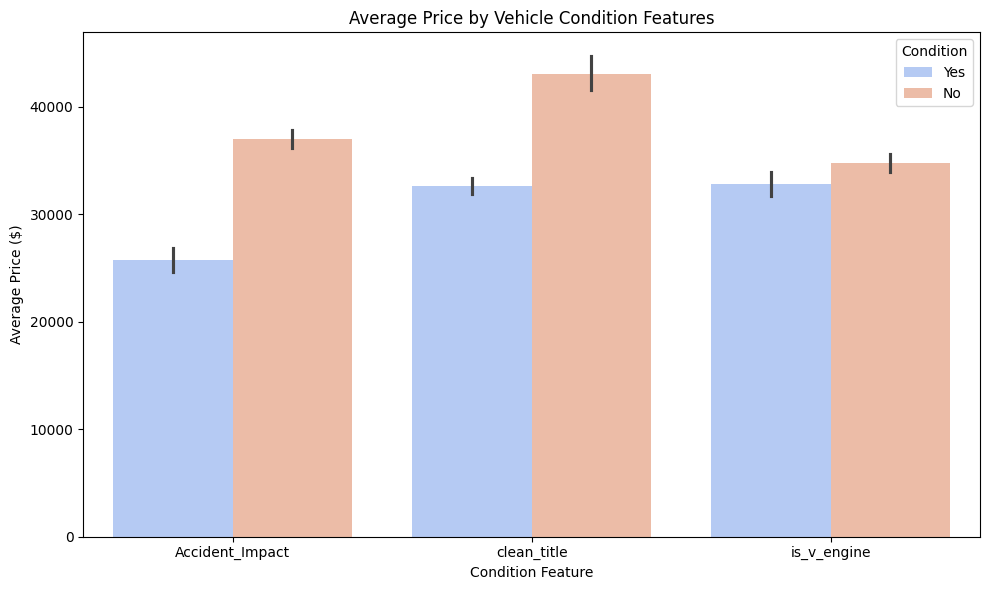

In [38]:
# Create a melted version of the condition features for grouped plotting
condition_cols = ['Accident_Impact', 'clean_title', 'is_v_engine']

# Convert binary flags (0/1) to readable labels
df_plot = df[condition_cols + ['price']].melt(
    id_vars='price',
    var_name='Condition',
    value_name='Flag'
)

# Replace 0/1 with 'No'/'Yes' for clarity
df_plot['Flag'] = df_plot['Flag'].map({0: 'No', 1: 'Yes'})

plt.figure(figsize=(10,6))
sns.barplot(
    data=df_plot,
    x='Condition',
    y='price',
    hue='Flag',
    estimator='mean',
    palette='coolwarm'
)
plt.title('Average Price by Vehicle Condition Features')
plt.xlabel('Condition Feature')
plt.ylabel('Average Price ($)')
plt.legend(title='Condition', loc='upper right')
plt.tight_layout()
plt.show()


### 7- Fuel_type , Hp & Transmission by Average Price

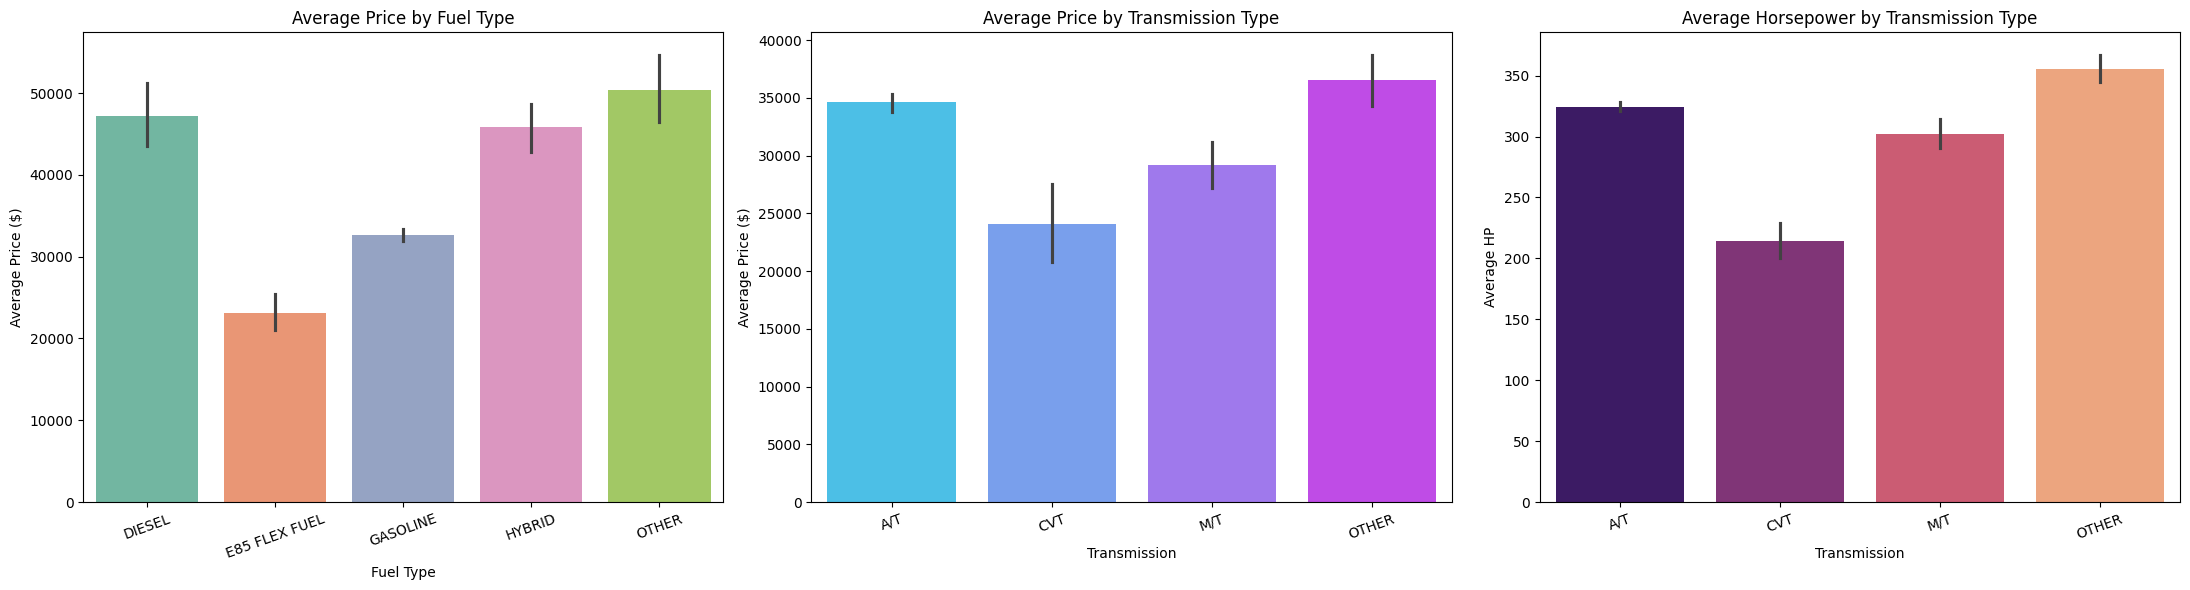

In [39]:
# Set up figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(22, 6))

# Average Price by Fuel Type
sns.barplot(x='fuel_type', y='price', hue='fuel_type', data=df,
            estimator='mean', palette='Set2', legend=False, ax=axes[0])
axes[0].set_title('Average Price by Fuel Type')
axes[0].set_xlabel('Fuel Type')
axes[0].set_ylabel('Average Price ($)')
axes[0].tick_params(axis='x', rotation=20)

# Average Price by Transmission Type
sns.barplot(x='transmission', y='price', hue='transmission', data=df,
            estimator='mean', palette='cool', legend=False, ax=axes[1])
axes[1].set_title('Average Price by Transmission Type')
axes[1].set_xlabel('Transmission')
axes[1].set_ylabel('Average Price ($)')
axes[1].tick_params(axis='x', rotation=20)

# Average Horsepower (HP) by Transmission Type
sns.barplot(x='transmission', y='hp', hue='transmission', data=df,
            estimator='mean', palette='magma', legend=False, ax=axes[2])
axes[2].set_title('Average Horsepower by Transmission Type')
axes[2].set_xlabel('Transmission')
axes[2].set_ylabel('Average HP')
axes[2].tick_params(axis='x', rotation=20)

plt.tight_layout()
plt.show()


### 8- fuel_type and transmission value count

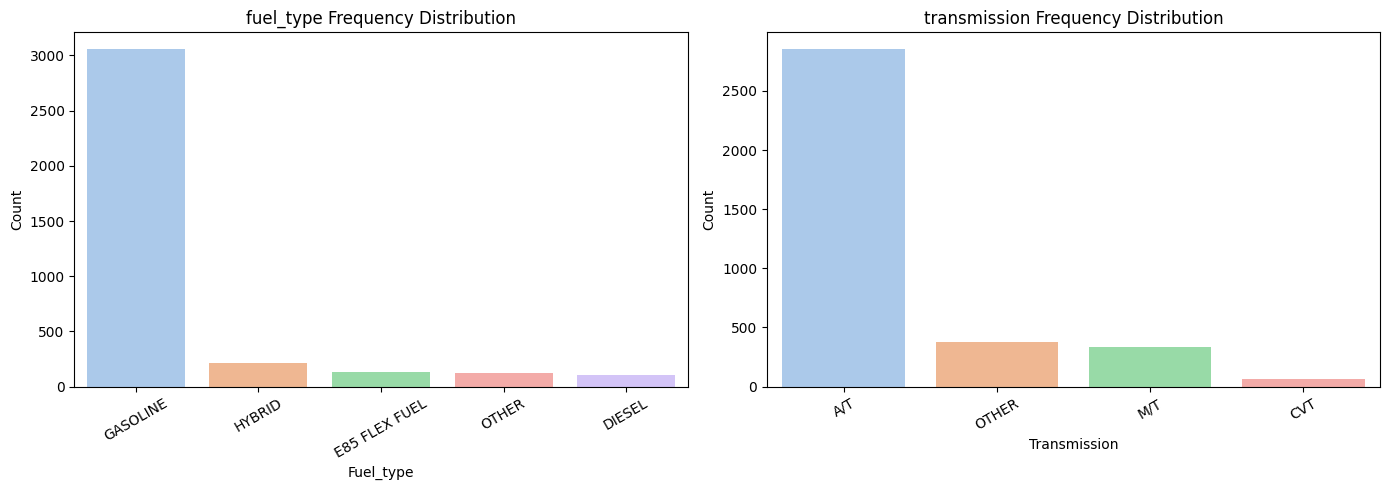

In [40]:
# Create a single row with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

cat_cols = ['fuel_type', 'transmission']

for i, col in enumerate(cat_cols):
    sns.countplot(x=col, data=df, order=df[col].value_counts().index, ax=axes[i], palette='pastel')
    axes[i].set_title(f'{col} Frequency Distribution')
    axes[i].set_xlabel(col.capitalize())
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()


### 9- Cars by Vehicle Age

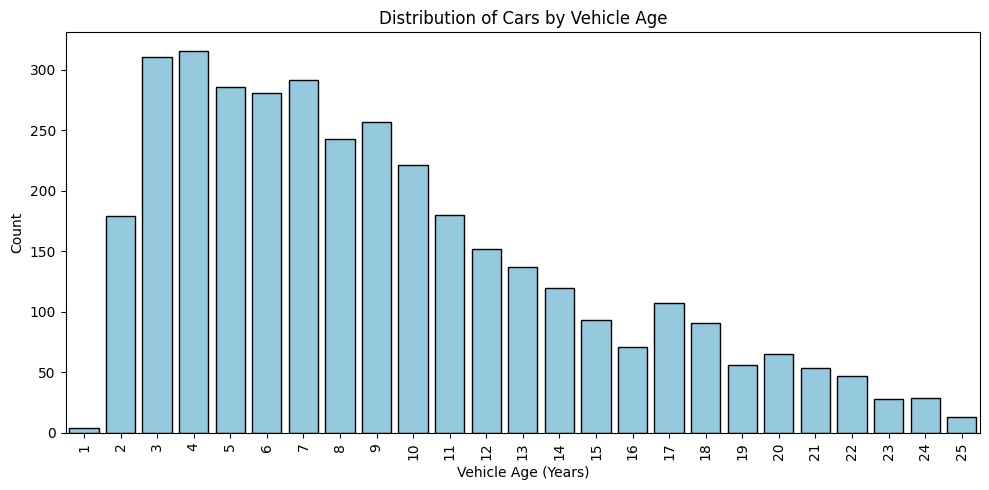

In [41]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Vehicle_Age', width=0.8, color='skyblue', edgecolor='black')
plt.xticks(rotation=90)
plt.xlabel('Vehicle Age (Years)')
plt.ylabel('Count')
plt.title('Distribution of Cars by Vehicle Age')
plt.tight_layout()
plt.show()


### 📊 Step 4 Summary: Exploratory Data Analysis (EDA)

- Conducted **visual and statistical analysis** to understand key feature relationships affecting car prices.  
- **Numerical features** (`price`, `hp`, `engine_displacement`, `milage`, `Vehicle_Age`) showed moderate skewness with no major anomalies.  
- **Correlation heatmap** highlighted:
  - `hp` and `engine_displacement` are **positively correlated** with `price`.  
  - `Vehicle_Age` and `milage` are **negatively correlated** with `price`.  
- **Categorical insights:**
  - **Gasoline vehicles** dominate, followed by **hybrids**.  
  - **Automatic transmissions** are most common and typically have higher prices.  
- **Brand-level trends:** Luxury brands (e.g., Lexus, BMW, Mercedes) maintain higher average prices despite fewer listings.  
- **Condition-based features** (`Accident_Impact`, `clean_title`, `is_v_engine`) show:
  - Cars with **no accidents**, **clean titles**, and **V-type engines** are priced higher on average.  
- **Scatterplots** confirmed:
  - **Positive** trends for `hp` and `engine_displacement` with price.  
  - **Negative** trends for `Vehicle_Age` and `milage`.  
- Most vehicles fall between **3–10 years old**, aligning with typical used car market patterns.  

✅ EDA validated meaningful patterns and relationships, guiding the next step of model building.


### Saving Data file before modeling

In [42]:
df.to_csv("Second_ride_before_modeling.csv")
print(f"\n💾 Total memory usage before modeling : {df.memory_usage(deep=True).sum() / (1024**2):.2f} MB") # 0.41 MB


💾 Total memory usage before modeling : 0.41 MB


# 5- Model Building and Evaluation 
- This step involves selecting appropriate machine learning algorithms, training models on the prepared dataset, and evaluating their performance using relevant metrics to ensure they meet the desired objectives.

### 1- Split data

In [ ]:
# Convert categorical columns to numeric codes
label_encoders = {}
cat_cols = ['brand', 'fuel_type', 'transmission', 'clean_title', 'Accident_Impact']

for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
   

# Save the label encoders for inference
joblib.dump(label_encoders, 'label_encoders.pkl')

# Split the data
X = df.drop('price', axis=1)
y = df['price']

### 2- Train-test split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

### 3- Feature scaling

In [45]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

display(X_train.columns.tolist())

['brand',
 'milage',
 'fuel_type',
 'transmission',
 'clean_title',
 'hp',
 'engine_displacement',
 'is_v_engine',
 'Vehicle_Age',
 'Mileage_per_Year',
 'Age_Mid',
 'Age_Old',
 'Age_Very Old',
 'Milage_Medium',
 'Milage_High',
 'Milage_Very High',
 'Accident_Impact']

### 4- Define and train models

In [46]:
models = {
    # Linear models (leave defaults, simple, interpretable)
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.01),  # smaller alpha, less aggressive feature removal

    # Random Forest (tuned to reduce overfitting)
    "Random Forest": RandomForestRegressor(
        n_estimators=200,       # more trees for stability
        max_depth=6,            # limit depth to reduce overfitting
        min_samples_split=5,    # minimum samples to split a node
        min_samples_leaf=3,     # minimum samples in a leaf
        random_state=42
    ),

    # XGBoost (tuned to reduce overfitting)
    "XGBoost": XGBRegressor(
        n_estimators=300,
        learning_rate=0.05,     # smaller learning rate for smoother learning
        max_depth=5,            # limit depth
        min_child_weight=3,     # minimum sum of instance weight in a child
        subsample=0.8,          # random subset of rows for each tree
        colsample_bytree=0.8,   # random subset of features for each tree
        reg_alpha=0.1,          # L1 regularization
        reg_lambda=1.0,         # L2 regularization
        random_state=42
    )
}

### 5- Train, predict, and evaluate

In [47]:
# Evaluate all models and summarize results
results = []

for name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)

    # Predict on training and test data
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)

    # Evaluate performance on both train and test
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)

    # Detect overfitting/underfitting
    if r2_train - r2_test > 0.1:
        fit_status = "Overfitting"
    elif r2_train < 0.5 and r2_test < 0.5:
        fit_status = "Underfitting"
    else:
        fit_status = "Good Fit"

    # Store results
    results.append({
        "Model": name,
        "R² Train": r2_train,
        "R² Test": r2_test,
        "RMSE Train": rmse_train,
        "RMSE Test": rmse_test,
        "MAE Train": mae_train,
        "MAE Test": mae_test,
        "Fit Status": fit_status
    })

### 6- Display model comparison results

In [48]:
# Convert results to DataFrame for easy comparison
results_df = pd.DataFrame(results)

results_df = results_df.sort_values(by="R² Test", ascending=False).reset_index(drop=True)

print("Model Comparison Results:")
display(results_df)

Model Comparison Results:


,Model,R² Train,R² Test,RMSE Train,RMSE Test,MAE Train,MAE Test,Fit Status
0,XGBoost,0.941355,0.869787,5092.268930,7638.526966,3712.012655,5418.589414,Good Fit
1,Random Forest,0.813075,0.774751,9091.389963,10046.483224,6514.821881,7134.119102,Good Fit
2,Linear Regression,0.718381,0.714466,11159.060836,11311.263327,8219.525306,8211.574132,Good Fit
3,Lasso Regression,0.718381,0.714466,11159.060836,11311.268801,8219.525579,8211.581922,Good Fit
4,Ridge Regression,0.718380,0.714444,11159.062587,11311.694664,8219.375395,8212.055124,Good Fit


### 7- Scatter Plot: Predicted vs Actual Prices

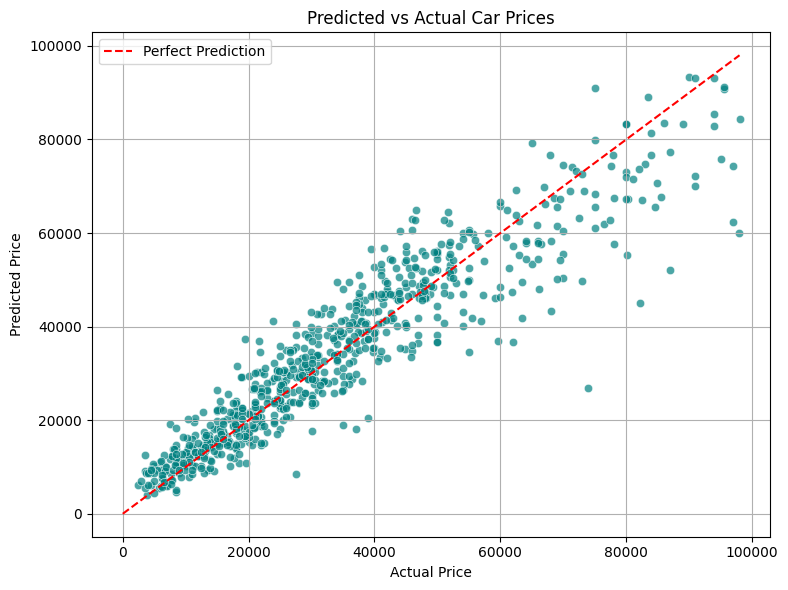

In [49]:
# Use the best model (for example, XGBoost)
best_model = models["XGBoost"]

# Train on all training data
best_model.fit(X_train_scaled, y_train)

# Predict on test data
y_pred = best_model.predict(X_test_scaled)

# 📈 Create scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, color='teal')

# Add reference line (perfect prediction line)
max_val = max(y_test.max(), y_pred.max())
plt.plot([0, max_val], [0, max_val], color='red', linestyle='--', label='Perfect Prediction')

# Add titles and labels
plt.title("Predicted vs Actual Car Prices")
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### 8- Saving the best model

In [50]:
best_model = models["XGBoost"]

# This allows reusing the trained model without retraining
joblib.dump(best_model, "xgboost_used_car_price_model.pkl")
print("✅ XGBoost model saved successfully as 'xgboost_used_car_price_model.pkl'")

# Important for future predictions — ensures input data is scaled the same way
joblib.dump(scaler, "scaler.pkl")
print("✅ Scaler saved successfully as 'scaler.pkl'")

# can now be used for prediction or deployment (e.g., Power BI, Streamlit, API)


✅ XGBoost model saved successfully as 'xgboost_used_car_price_model.pkl'
✅ Scaler saved successfully as 'scaler.pkl'


### 🤖 Step 5 Summary: Machine Learning Modeling

- Converted all categorical features (`brand`, `fuel_type`, `transmission`, `clean_title`, `Accident_Impact`) into numeric codes for model compatibility.  
- Split the dataset into **features (`X`)** and **target (`y = price`)**, using an **80/20 train-test split**.  
- Applied **StandardScaler** to normalize numeric features for better model performance.  
- Trained and compared five regression models:
  1. Linear Regression  
  2. Ridge Regression  
  3. Lasso Regression  
  4. Random Forest Regressor  
  5. XGBoost Regressor  
- Evaluated models using:
  - **R² Score** → measures how well the model explains price variance.  
  - **RMSE** → measures average prediction error (lower = better). 
  - **MAE**  → measures average absolute prediction error (lower = better).
- Results showed **XGBoost Regressor** achieved the **highest accuracy (R² ≈ 0.85)** after outlier removal, outperforming all other models.  
- The trained **XGBoost model** was saved as `xgboost_used_car_price_model.pkl` for future deployment, along with its scaler for consistent data preprocessing.  

✅ The XGBoost model is selected as the final predictive model for used car price estimation.


## 🚗 Second Ride Project — Final Summary

### 📘 Overview
This project aimed to predict the **price of used cars** based on key features such as brand, mileage, engine specifications, transmission type, fuel type, and condition-related attributes.  
The process followed a complete end-to-end **data science workflow** — from data cleaning to model evaluation and saving the final model.

---

### 🧹 Step 2: Data Cleaning
- Removed symbols and standardized values in `price` and `milage`.  
- Unified text formats for `fuel_type`, `transmission`, and `clean_title`.  
- Converted all columns to proper data types (categorical, float, or int).  
- Handled missing data using brand-level or logical imputation.  
- Removed **67 cars** with model year < 2000.  
- Removed **outliers** in `price` and `milage` using the IQR method (≈250 rows), improving data consistency.  
- Final dataset reduced to **3,630 rows** and optimized to **0.72 MB** memory usage.

---

### ⚙️ Step 3: Feature Engineering
- Extracted `Vehicle_Age` and computed `Mileage_per_Year`.  
- Created categorical groupings (`Age_Mid`, `Age_Old`, `Age_Very Old`, etc.).  
- Added binary indicators for conditions like:
  - `Accident_Impact`
  - `is_v_engine`
  - `clean_title`
- Encoded categorical features for modeling.
- Added **brand-level mean price encoding** to capture brand price influence.

---

### 📊 Step 4: Exploratory Data Analysis (EDA)
- Analyzed distributions for numerical features (`price`, `hp`, `engine_displacement`, etc.).  
- **Correlation heatmap** showed:
  - Positive: `hp`, `engine_displacement` ↗ `price`  
  - Negative: `Vehicle_Age`, `milage` ↘ `price`
- **Categorical Insights**:
  - Gasoline & automatic cars dominate and have higher prices.
- **Condition Features**:
  - Cars with `clean_title`, no `Accident_Impact`, and V-type engines tend to be priced higher.
- **Brand Analysis**:
  - Luxury brands (Lexus, BMW, Mercedes) have the highest average prices.
- Overall, EDA confirmed logical relationships between car features and pricing.

---

### 🤖 Step 5: Model Training & Evaluation
- Split dataset into **80% training** and **20% testing** sets.  
- Scaled numerical features using `StandardScaler`.  
- Trained multiple regression models:
  - **Linear Regression**
  - **Ridge Regression**
  - **Lasso Regression**
  - **Random Forest**
  - **XGBoost**
- Evaluated models using:
  - **R² Score**
  - **Root Mean Squared Error (RMSE)**
  - **Mean Absolute Error (MAE)**

🏆 **Best Model:** XGBoost Regressor  
- Achieved **R² = 0.870241** after removing outliers.  
- Demonstrated strong alignment between predicted and actual car prices.

---

### 💾 Step 6: Model Saving
- The best-performing **XGBoost model** was saved as a `.pkl` file for future use:
  ```python
  joblib.dump(best_model, "car_price_model.pkl")
